In [ ]:
!pip install yahoo_fin requests_html

In [1]:
# Step 1: Install the stable library (Run this line once)
!pip install yfinance

# Step 2: Import necessary libraries
import yfinance as yf
import pandas as pd
from datetime import datetime

# Define the stock symbol (e.g., GOOG for Google, AAPL for Apple)
ticker_symbol = 'GOOG'
print(f"Initializing for ticker: {ticker_symbol}...")

# ---------------------------------------------------------
# Part 1: Get Live Price Data
# ---------------------------------------------------------
try:
    # Create a Ticker object
    ticker_data = yf.Ticker(ticker_symbol)

    # Get the latest price using fast_info (more stable than yahoo_fin)
    live_price = ticker_data.fast_info['last_price']
    
    # Print the price formatted to 2 decimal places
    print(f"The current price of {ticker_symbol} is: ${live_price:.2f}")

    # Save live price to a DataFrame and then to CSV
    live_price_df = pd.DataFrame({
        'Timestamp': [datetime.now()],
        'Price': [live_price]
    })
    
    live_price_df.to_csv('live_price.csv', index=False)
    print(">> Success: Live price saved to 'live_price.csv'")

except Exception as e:
    print(f"Error fetching live price: {e}")

# ---------------------------------------------------------
# Part 2: Get Historical Data
# ---------------------------------------------------------
try:
    # Define date range: from 2016-01-01 to today
    start_date = '2016-01-01'
    end_date = datetime.today().strftime('%Y-%m-%d')

    print(f"\nDownloading historical data from {start_date} to {end_date}...")

    # Download data using yfinance
    historical_data = yf.download(ticker_symbol, start=start_date, end=end_date)

    # Save historical data to CSV
    historical_data.to_csv('Google.csv')
    print(">> Success: Historical data saved to 'Google.csv'")

    # Display the last 5 rows of the data to verify
    print("\nLast 5 rows of the dataset:")
    print(historical_data.tail())

except Exception as e:
    print(f"Error fetching historical data: {e}")

Initializing for ticker: GOOG...


/tmp/ipykernel_133/1506745165.py:49: FutureWarning: YF.download() has changed argument auto_adjust default to True
  historical_data = yf.download(ticker_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

The current price of GOOG is: $320.12
>> Success: Live price saved to 'live_price.csv'



>> Success: Historical data saved to 'Google.csv'

Last 5 rows of the dataset:
Price            Close        High         Low        Open    Volume
Ticker            GOOG        GOOG        GOOG        GOOG      GOOG
Date                                                                
2025-11-21  299.649994  303.959991  294.359985  296.869995  43670600
2025-11-24  318.470001  319.799988  309.399994  311.010010  55311800
2025-11-25  323.640015  328.670013  317.816010  326.799988  50899300
2025-11-26  320.279999  324.989990  317.200012  320.779999  29839600
2025-11-28  320.119995  326.880005  316.940002  323.429993  19695800


# Import Libraries & Settings

In [1]:
# Install yfinance if not already installed on Kaggle
!pip install yfinance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Setting a seed for reproducibility (optional)
import tensorflow as tf
tf.random.set_seed(42)

print("Libraries imported successfully!")

2025-12-01 11:14:40.149660: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764587680.315091      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764587680.361193      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Libraries imported successfully!


# Load and Visualize Data

/tmp/ipykernel_47/1011186996.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


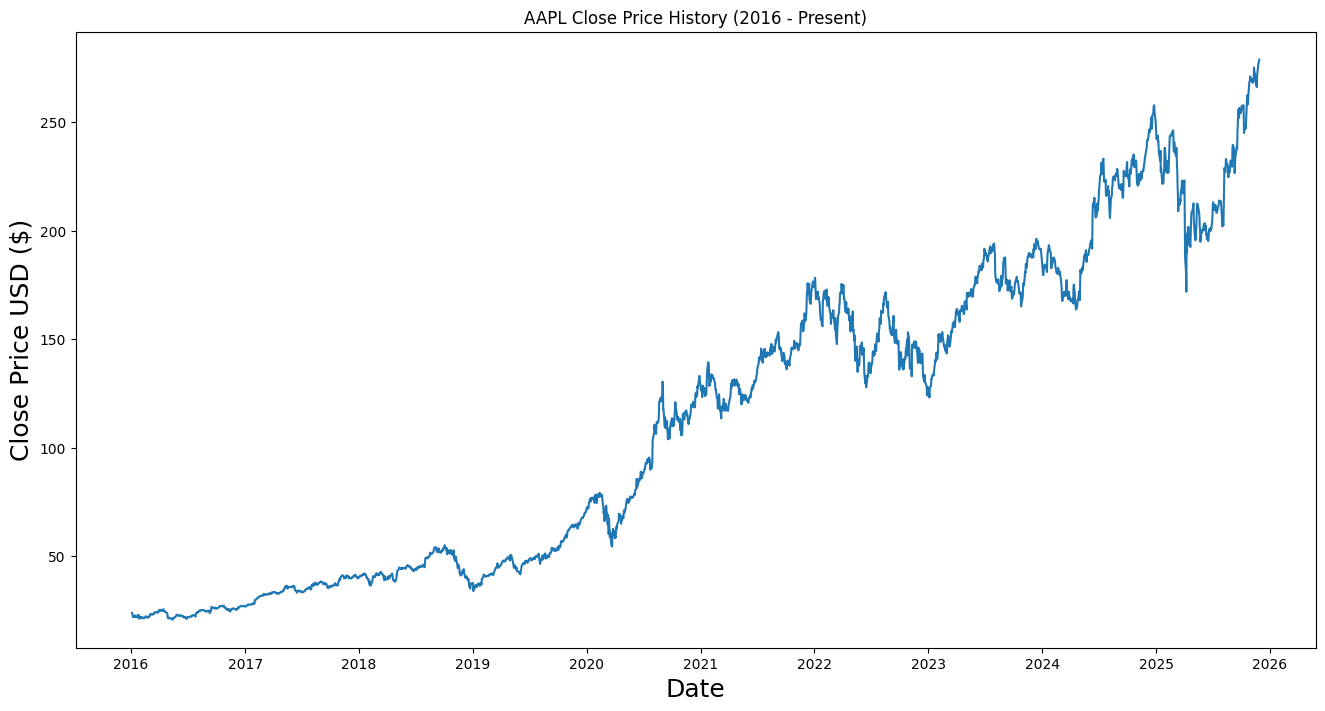

Price            Close
Ticker            AAPL
Date                  
2025-11-21  271.489990
2025-11-24  275.920013
2025-11-25  276.970001
2025-11-26  277.549988
2025-11-28  278.850006


In [11]:
# Import datetime to get the current date automatically
from datetime import datetime

# 1. Download Data
stock_symbol = 'AAPL' # Or 'GOOG', 'BTC-USD', etc.

# Set start date to 2016 as you requested
start_date = '2016-01-01'

# Set end date to TODAY automatically
# strftime('%Y-%m-%d') converts the date to format '2025-12-01'
end_date = datetime.today().strftime('%Y-%m-%d')

print(f"Downloading data from {start_date} to {end_date}...")

df = yf.download(stock_symbol, start=start_date, end=end_date)

# 2. Select 'Close' column
data = df[['Close']]

# 3. Visualization
plt.figure(figsize=(16,8))
plt.title(f'{stock_symbol} Close Price History (2016 - Present)')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

# Show the last 5 rows to confirm we have the latest data
print(data.tail())

# Data Preprocessing & Scaling

In [12]:
# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on (80% for training)
training_data_len = int(np.ceil(len(dataset) * 0.8))

# Scale the data (Normalize between 0 and 1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

print(f"Data scaled. Training data length: {training_data_len}")

Data scaled. Training data length: 1994


# Create Training Sequences (The Sliding Window)

In [14]:
# Create the training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train
x_train = []
y_train = []

prediction_days = 60  # Look back 60 days to predict the next day

for i in range(prediction_days, len(train_data)):
    x_train.append(train_data[i-prediction_days:i, 0]) # The previous 60 days
    y_train.append(train_data[i, 0]) # The current day (label)

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data for LSTM [samples, time steps, features]
# LSTM expects 3D input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print(f"x_train shape: {x_train.shape}")

x_train shape: (1934, 60, 1)


# Build the LSTM Model

In [15]:
model = Sequential()

# Layer 1: LSTM with Return Sequences (to feed into next LSTM layer)
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2)) # Prevent overfitting

# Layer 2: LSTM without Return Sequences (last LSTM layer)
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Layer 3: Dense Layers
model.add(Dense(units=25))
model.add(Dense(units=1)) # Output layer (Prediction)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [19]:
# Train the model
# batch_size=32 and epochs=25 are good starting points
history = model.fit(x_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.7946e-04
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.9476e-04
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.6090e-04
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.2549e-04
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.7209e-04
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.0718e-04
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.0148e-04
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.0017e-04
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.5182e-04
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.1141e-04
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.6848e-04
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.1341e-04
Epoch 13/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5770e-04
Epoch 14/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5424e-04
Epoch 15/50
61/61 ━━━━━━━━━━

# Create Test Data & Make Predictions

In [20]:
# Create a new array containing scaled values from index training_data_len - 60
test_data = scaled_data[training_data_len - prediction_days: , :]

# Create x_test and y_test sets
x_test = []
y_test = dataset[training_data_len:, :] # Actual values (not scaled) for validation

for i in range(prediction_days, len(test_data)):
    x_test.append(test_data[i-prediction_days:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values
predictions = model.predict(x_test)
# Inverse transform to get actual prices (un-scale)
predictions = scaler.inverse_transform(predictions)

print("Predictions made successfully.")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Predictions made successfully.


# Visualize the Results

/tmp/ipykernel_47/909002231.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


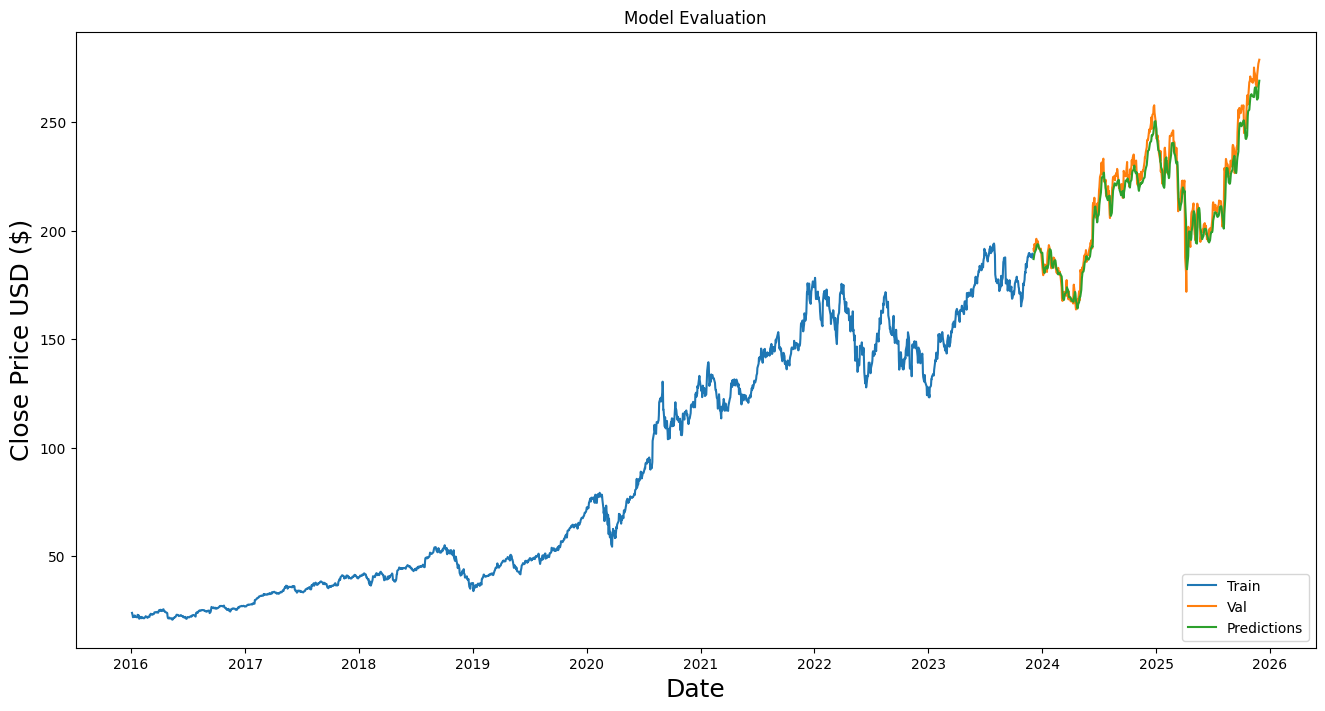

In [21]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model Evaluation')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [9]:
# Step 9: Predict the Next Day's Price
# ---------------------------------------------------------

# 1. Get the last 60 days of the data
last_60_days = scaled_data[-60:]

# 2. Reshape the data to be [1, 60, 1]
# Because the model expects 3D input: (samples, time_steps, features)
X_future = np.array([last_60_days])
X_future = np.reshape(X_future, (X_future.shape[0], X_future.shape[1], 1))

# 3. Make the prediction
pred_price = model.predict(X_future)

# 4. Undo the scaling (Inverse Transform)
pred_price = scaler.inverse_transform(pred_price)

print(f"\n=======================================================")
print(f"Predicted Price for the Next Day: $ {pred_price[0][0]:.2f}")
print(f"=======================================================")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

Predicted Price for the Next Day: $ 190.37


In [10]:
# Step 10: Save the Model
# ---------------------------------------------------------
import os

# Define the file name (using .keras extension is recommended for TensorFlow 2.x)
model_filename = 'stock_prediction_lstm.keras'

# Save the entire model (architecture, weights, and optimizer state)
model.save(model_filename)

print(f">> Success: Model saved as '{model_filename}'")
print(f">> You can find this file in the output directory of your notebook.")

>> Success: Model saved as 'stock_prediction_lstm.keras'
>> You can find this file in the output directory of your notebook.


In [ ]:
# Step 11: Load the Model (For future use)
# ---------------------------------------------------------
from tensorflow.keras.models import load_model

print("Loading the model...")

# Load the model from the file
loaded_model = load_model('stock_prediction_lstm.keras')

# Verify the model structure
loaded_model.summary()

# Example: Make a prediction using the loaded model
# We use 'X_future' which we prepared in the previous step
predicted_price = loaded_model.predict(X_future)

# Inverse transform to get the real price
predicted_price = scaler.inverse_transform(predicted_price)

print(f"\nPrediction from the loaded model: $ {predicted_price[0][0]:.2f}")